<a href="https://colab.research.google.com/github/jeba0909/EDA/blob/main/21BDS0320_M5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 5**

In [3]:
# Libraries
from sklearn.cluster import SpectralClustering, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [4]:

# Load dataset
data = pd.read_csv('/content/PPGE.csv')
numeric_cols = data.select_dtypes(include=np.number).columns


In [5]:

# Spectral Clustering
# Selecting first two numerical columns for visualization purposes
X = data[numeric_cols].dropna().values
spectral_cluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10)
labels_spectral = spectral_cluster.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


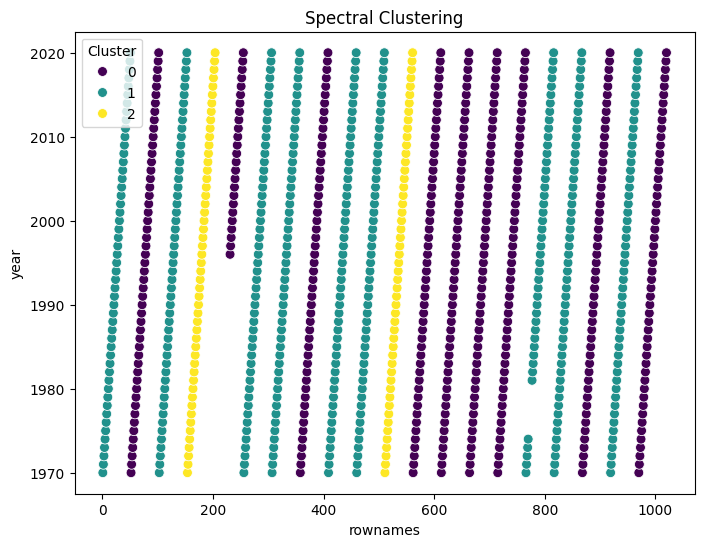

In [6]:
# Visualize Spectral Clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels_spectral, palette="viridis", s=50)
plt.title("Spectral Clustering")
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.legend(title="Cluster")
plt.show()


In [7]:

# Hierarchical Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels_agg = agg_cluster.fit_predict(X)


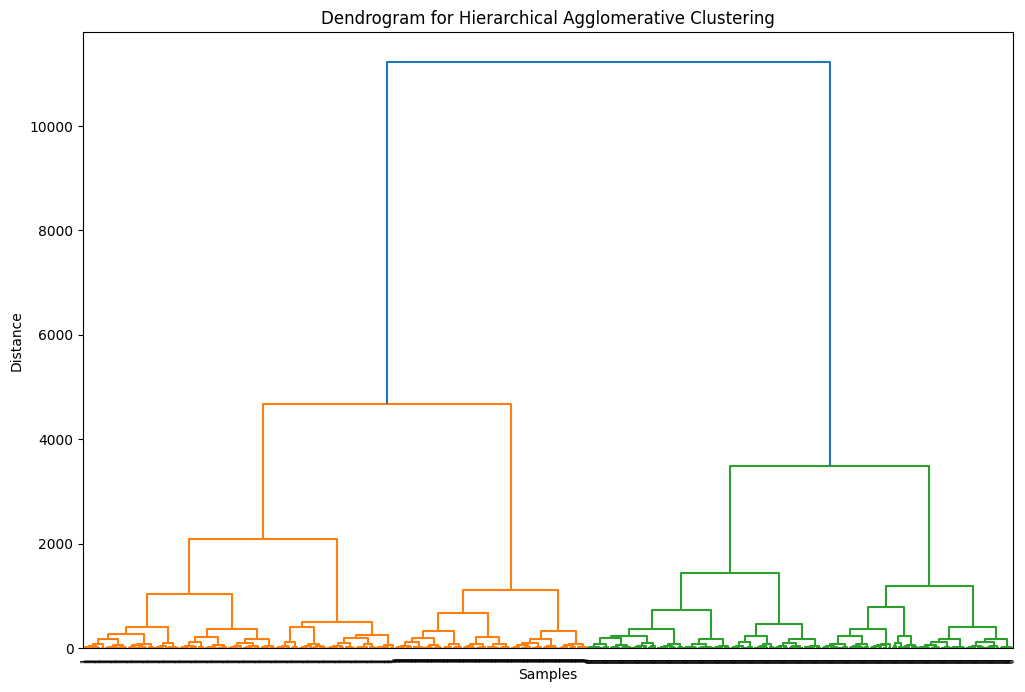

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform linkage for hierarchical clustering
linked = linkage(X, method='ward')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a dendrogram
dendrogram(linked, orientation='top', labels=labels_agg, distance_sort='descending', show_leaf_counts=True)

plt.title("Dendrogram for Hierarchical Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


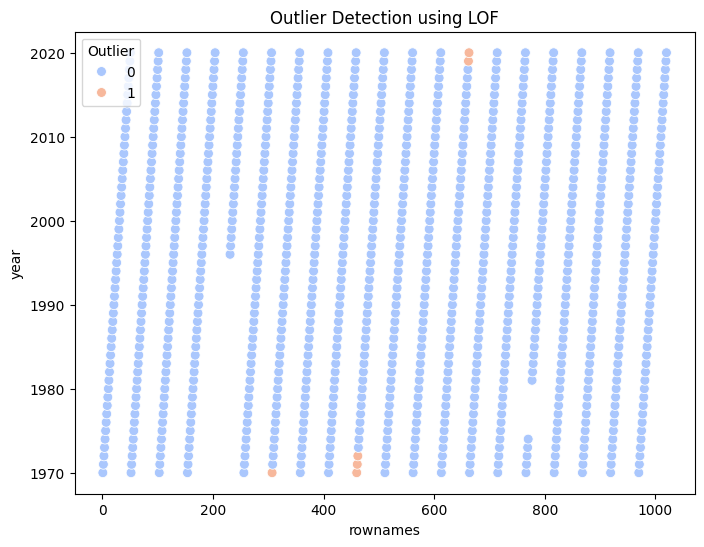

In [10]:
# Outlier Detection using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(X)
outliers = [1 if x == -1 else 0 for x in outliers]  # Mark outliers as 1

# Visualize Outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=outliers, palette="coolwarm", s=50)
plt.title("Outlier Detection using LOF")
plt.xlabel(numeric_cols[0])
plt.ylabel(numeric_cols[1])
plt.legend(title="Outlier")
plt.show()